# 1. Data loading and exploration:

### Import necessary libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV

import plotly.graph_objects as go

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_curve, auc
from sklearn.inspection import permutation_importance



In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [167]:
pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 27.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [129]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [131]:
pip install joypy

Note: you may need to restart the kernel to use updated packages.


### Load the dataset using pandas:

In [6]:
# Load the dataset
df = pd.read_csv('/Users/sahil/My Data/Boston Institue of Analytics/Final Capstone Project/digital_marketing_campaign_dataset.csv')

### Performing initial exploratory data analysis (EDA):

In [8]:
# Display the first few rows
print(df.head())

   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  Ema

In [10]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [12]:
# Check for missing values
print(df.isnull().sum())

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64


In [13]:
# Display summary statistics
print(df.describe())

        CustomerID          Age         Income      AdSpend  ClickThroughRate  \
count   8000.00000  8000.000000    8000.000000  8000.000000       8000.000000   
mean   11999.50000    43.625500   84664.196750  5000.944830          0.154829   
std     2309.54541    14.902785   37580.387945  2838.038153          0.084007   
min     8000.00000    18.000000   20014.000000   100.054813          0.010005   
25%     9999.75000    31.000000   51744.500000  2523.221165          0.082635   
50%    11999.50000    43.000000   84926.500000  5013.440044          0.154505   
75%    13999.25000    56.000000  116815.750000  7407.989369          0.228207   
max    15999.00000    69.000000  149986.000000  9997.914781          0.299968   

       ConversionRate  WebsiteVisits  PagesPerVisit   TimeOnSite  \
count     8000.000000    8000.000000    8000.000000  8000.000000   
mean         0.104389      24.751625       5.549299     7.727718   
std          0.054878      14.312269       2.607358     4.228218  

In [14]:
# Set the style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

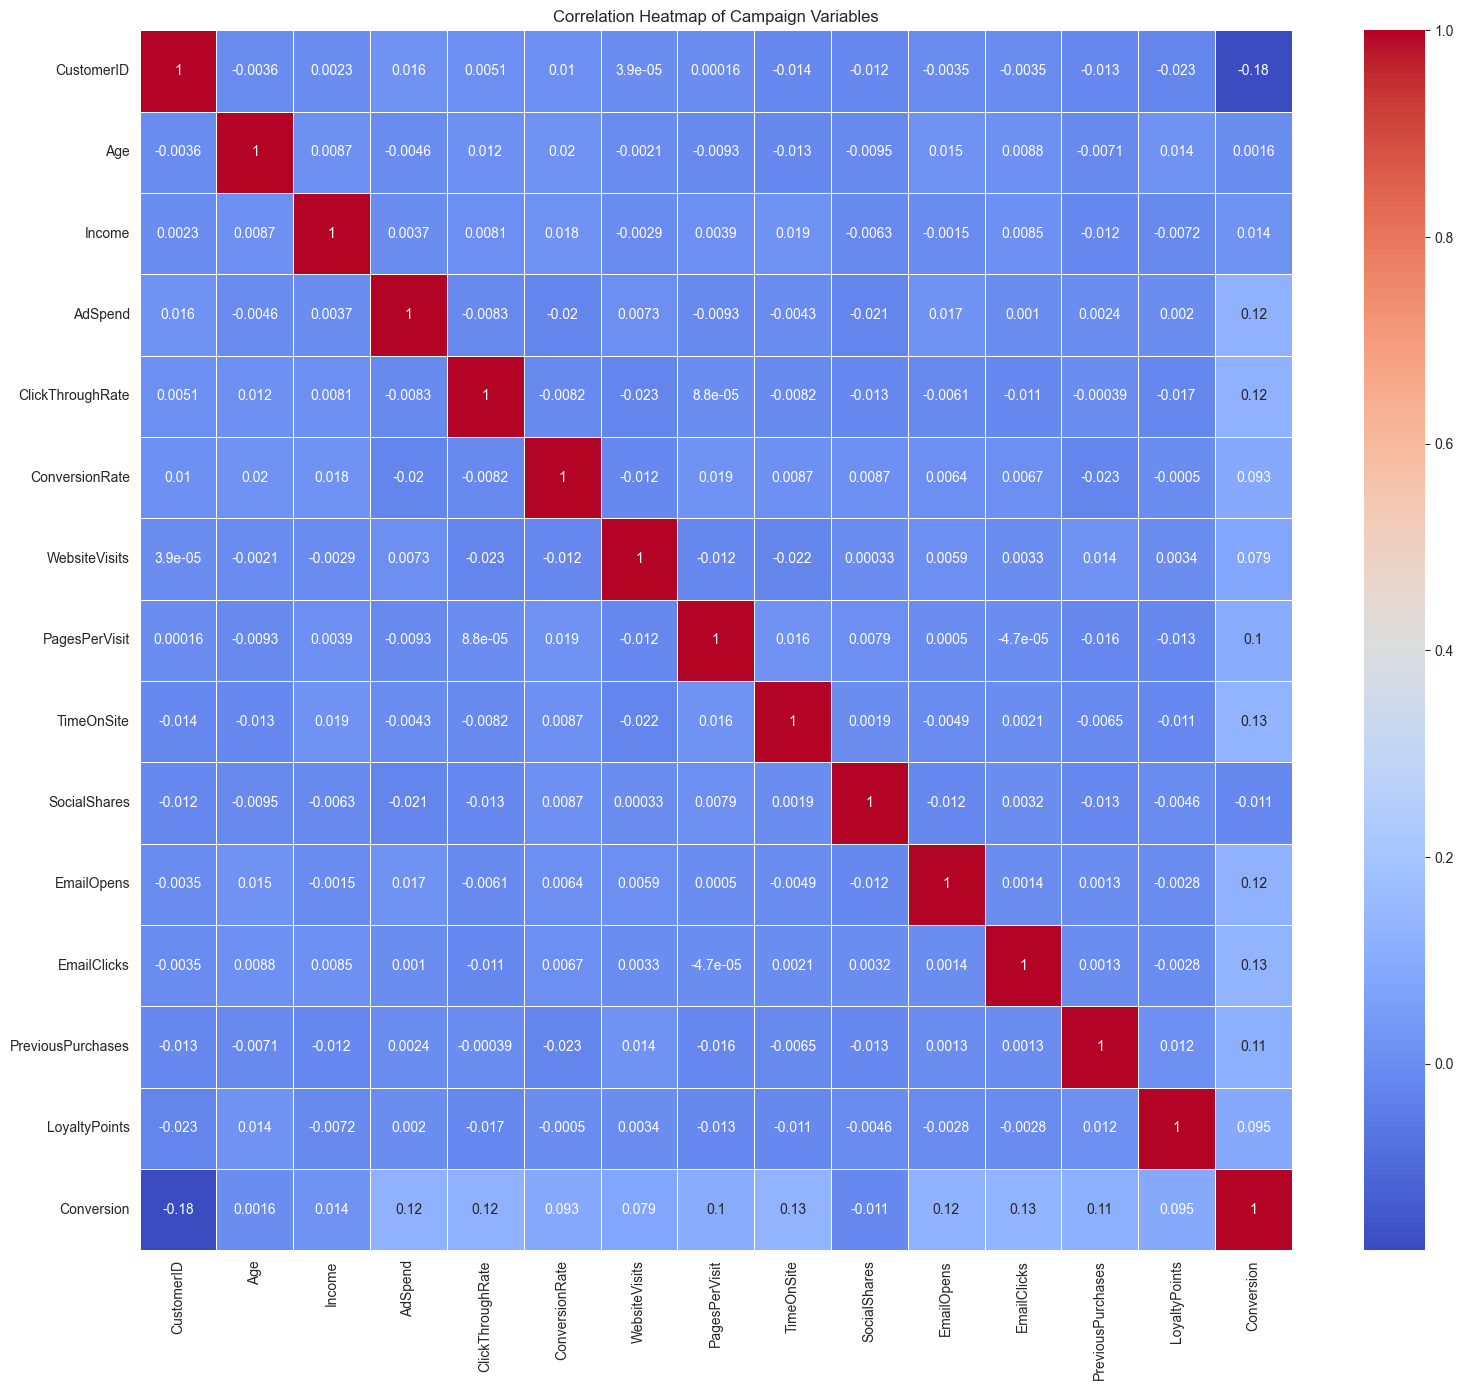

In [16]:
# 1. Correlation Heatmap
plt.figure(figsize=(16, 14))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Campaign Variables')
plt.tight_layout()
plt.show()

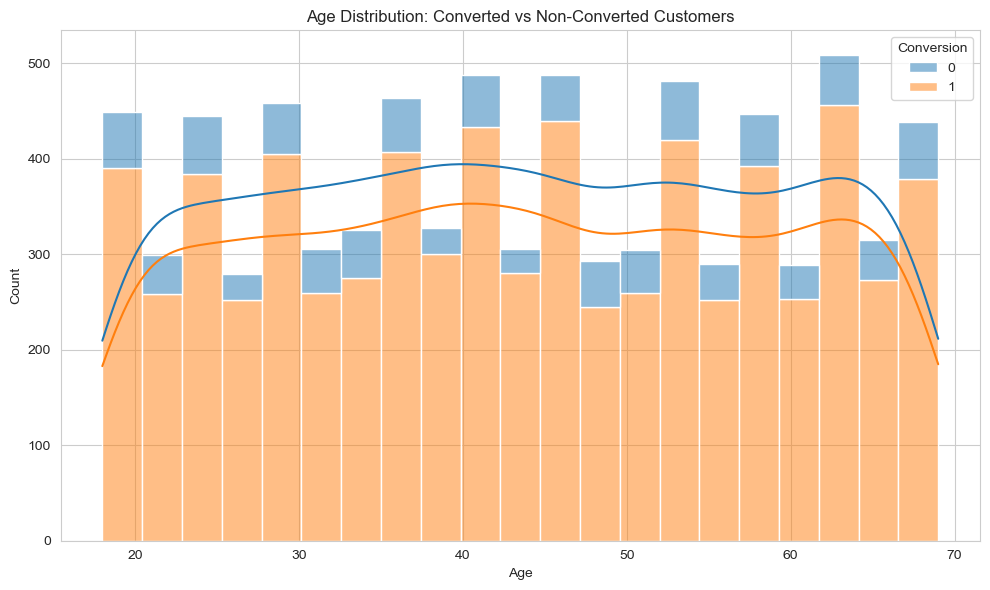

In [19]:
# 3. Age Distribution of Converted vs Non-Converted Customers
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Conversion', kde=True, multiple='stack')
plt.title('Age Distribution: Converted vs Non-Converted Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

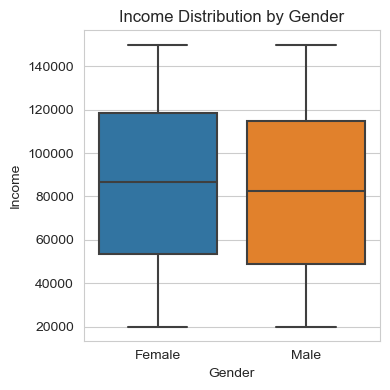

In [21]:
# 5. Income Distribution by Gender
plt.figure(figsize=(4, 4))
sns.boxplot(x='Gender', y='Income', data=df)
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

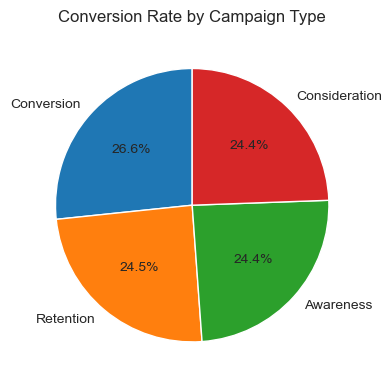

In [23]:
# 6. Conversion Rate by Campaign Type (Pie Chart)
conversion_by_type = df.groupby('CampaignType')['Conversion'].mean().sort_values(ascending=False)
plt.figure(figsize=(4, 4))
plt.pie(conversion_by_type, labels=conversion_by_type.index, autopct='%1.1f%%', startangle=90)
plt.title('Conversion Rate by Campaign Type')
plt.axis('equal')
plt.tight_layout()
plt.show()

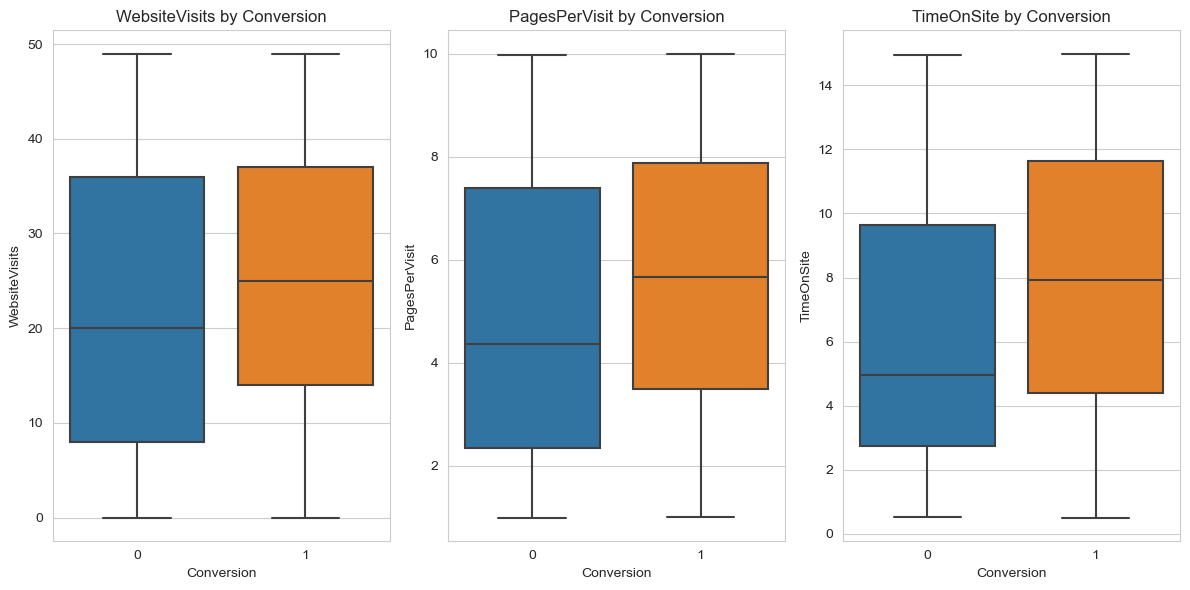

In [25]:
# 8. Website Engagement Metrics
engagement_metrics = ['WebsiteVisits', 'PagesPerVisit', 'TimeOnSite']
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
for i, metric in enumerate(engagement_metrics):
    sns.boxplot(x='Conversion', y=metric, data=df, ax=axes[i])
    axes[i].set_title(f'{metric} by Conversion')
    axes[i].set_xlabel('Conversion')
    axes[i].set_ylabel(metric)
plt.tight_layout()
plt.show()

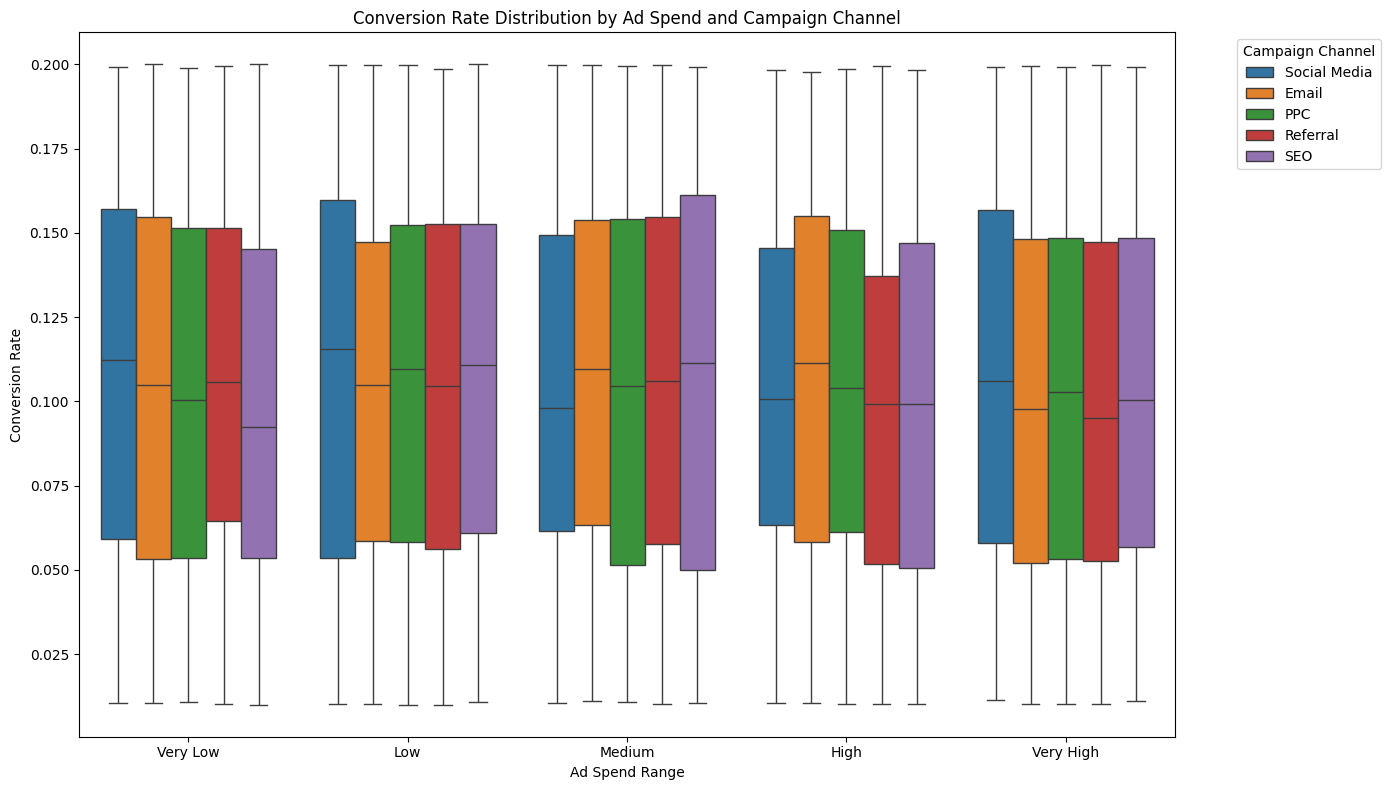

In [12]:
# Assuming df is your DataFrame
plt.figure(figsize=(14, 8))

# Create Ad Spend bins
df['AdSpendBin'] = pd.qcut(df['AdSpend'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Create the box plot
sns.boxplot(x='AdSpendBin', y='ConversionRate', hue='CampaignChannel', data=df)

plt.title('Conversion Rate Distribution by Ad Spend and Campaign Channel')
plt.xlabel('Ad Spend Range')
plt.ylabel('Conversion Rate')
plt.legend(title='Campaign Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [29]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("AdSpend Distribution by Campaign Channel"),
    
    dcc.Graph(id='adspend-distribution-plot'),
    
    html.Div([
        html.H3("Summary Statistics"),
        html.Div(id='summary-stats')
    ])
])

# Define the callback to update the graph
@app.callback(
    [Output('adspend-distribution-plot', 'figure'),
     Output('summary-stats', 'children')],
    Input('adspend-distribution-plot', 'relayoutData')
)
def update_graph(relayout_data):
    fig = px.box(df, x='CampaignChannel', y='AdSpend', 
                 title='AdSpend Distribution by Campaign Channel',
                 labels={'CampaignChannel': 'Campaign Channel', 'AdSpend': 'Ad Spend (USD)'},
                 color='CampaignChannel')
    
    fig.update_layout(showlegend=False)
    
    # Calculate summary statistics
    summary = df.groupby('CampaignChannel')['AdSpend'].describe().round(2)
    summary_html = [
        html.Table([
            html.Thead(html.Tr([html.Th("Channel")] + [html.Th(stat) for stat in summary.columns])),
            html.Tbody([
                html.Tr([html.Td(channel)] + [html.Td(summary.loc[channel, stat]) for stat in summary.columns])
                for channel in summary.index
            ])
        ])
    ]
    
    return fig, summary_html

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<Figure size 600x300 with 0 Axes>

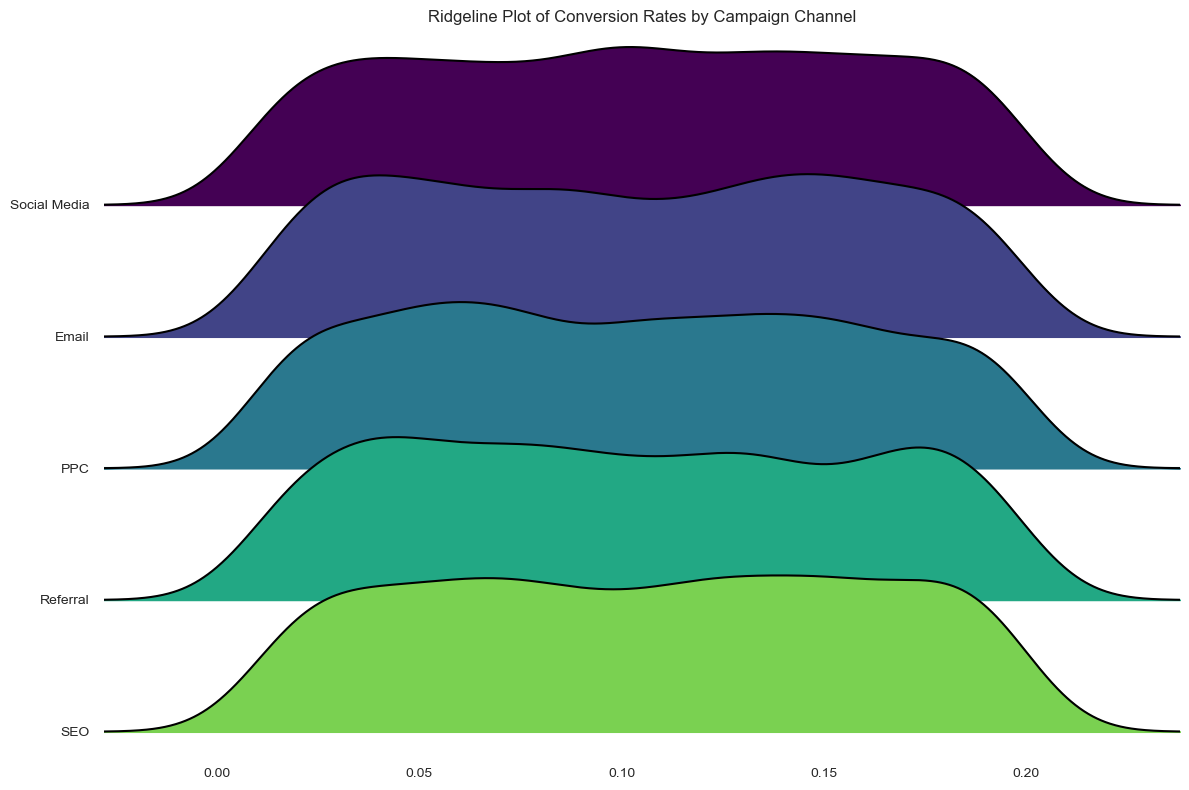

In [33]:
import joypy

plt.figure(figsize=(6, 3))
joypy.joyplot(
    data=df,
    by='CampaignChannel',
    column='ConversionRate',
    colormap=plt.cm.viridis,
    title='Ridgeline Plot of Conversion Rates by Campaign Channel',
    labels=df['CampaignChannel'].unique()
)
plt.show()

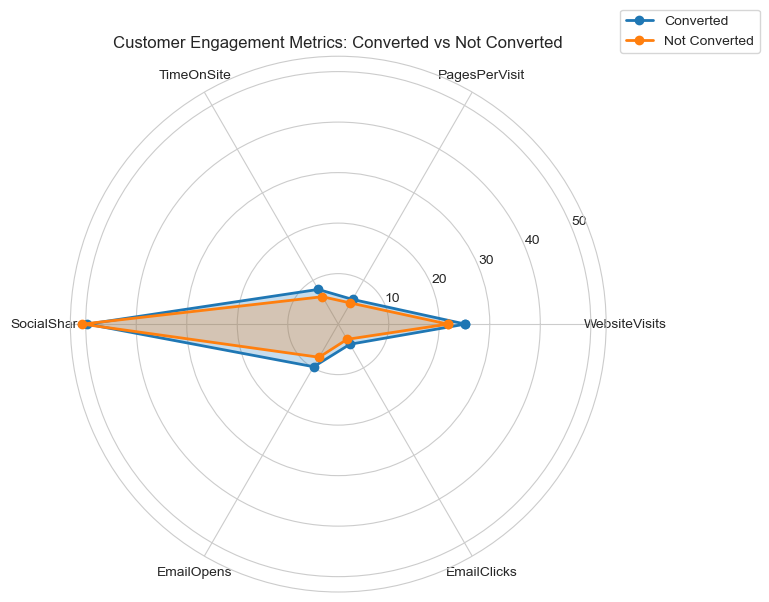

Average values for Converted customers:
WebsiteVisits    25.177838
PagesPerVisit     5.649945
TimeOnSite        7.933413
SocialShares     49.675556
EmailOpens        9.744581
EmailClicks       4.606246
dtype: float64

Average values for Non-Converted customers:
WebsiteVisits    21.726721
PagesPerVisit     4.835002
TimeOnSite        6.267871
SocialShares     50.681174
EmailOpens        7.576923
EmailClicks       3.481781
dtype: float64


In [35]:
# Select the metrics you want to compare
metrics = ['WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks']

# Create a function to calculate the average of each metric for a given segment
def get_segment_averages(segment):
    return df[df['Conversion'] == segment][metrics].mean()

# Calculate averages for converted and non-converted customers
converted = get_segment_averages(1)
not_converted = get_segment_averages(0)

# Set up the radar chart
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Complete the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))

# Plot data for converted customers
values = converted.values
values = np.concatenate((values, [values[0]]))  # Complete the circle
ax.plot(angles, values, 'o-', linewidth=2, label='Converted')
ax.fill(angles, values, alpha=0.25)

# Plot data for non-converted customers
values = not_converted.values
values = np.concatenate((values, [values[0]]))  # Complete the circle
ax.plot(angles, values, 'o-', linewidth=2, label='Not Converted')
ax.fill(angles, values, alpha=0.25)

# Set the labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_title('Customer Engagement Metrics: Converted vs Not Converted')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Adjust the layout and display the chart
plt.tight_layout()
plt.show()

# Print the average values
print("Average values for Converted customers:")
print(converted)
print("\nAverage values for Non-Converted customers:")
print(not_converted)

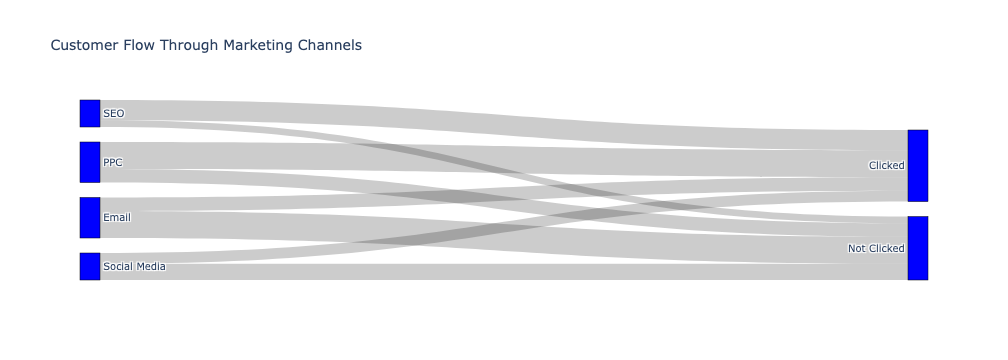

In [37]:
# Create a simplified flow (you may need to aggregate your data)
source = ["Email", "Email", "Social Media", "Social Media", "SEO", "SEO", "PPC", "PPC"]
target = ["Clicked", "Not Clicked", "Clicked", "Not Clicked", "Clicked", "Not Clicked", "Clicked", "Not Clicked"]
value = [100, 200, 80, 120, 150, 50, 200, 100]  # Replace with actual values

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Email", "Social Media", "SEO", "PPC", "Clicked", "Not Clicked"],
      color = "blue"
    ),
    link = dict(
      source = [0, 0, 1, 1, 2, 2, 3, 3],
      target = [4, 5, 4, 5, 4, 5, 4, 5],
      value = value
  ))])

fig.update_layout(title_text="Customer Flow Through Marketing Channels", font_size=10)
fig.show()

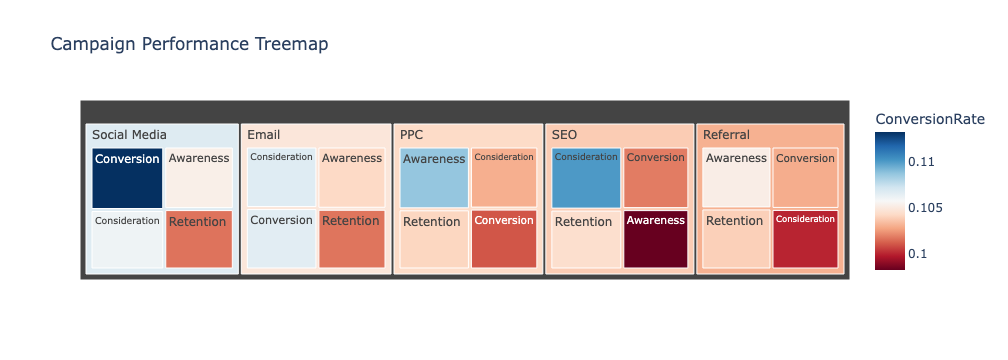

In [39]:
# Aggregate data
campaign_performance = df.groupby(['CampaignChannel', 'CampaignType'])['ConversionRate'].mean().reset_index()

fig = px.treemap(campaign_performance, 
                 path=['CampaignChannel', 'CampaignType'], 
                 values='ConversionRate',
                 color='ConversionRate',
                 color_continuous_scale='RdBu',
                 title='Campaign Performance Treemap')
fig.show()

# 2. DATA PREPROCESSING:

In [14]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()

# Handle missing values for numerical columns
num_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])

# Handle missing values for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

# Encode categorical variables
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Scale numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Separate features and target variable
X = df.drop(['CustomerID', 'Conversion'], axis=1)
y = df['Conversion']

print("\nPreprocessing complete.")
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Missing values:
CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
AdSpendBin             0
dtype: int64

Preprocessing complete.
Features shape: (8000, 19)
Target shape: (8000,)


# 3. FEATURE ENGINEERING:

## Create the following new features:
### a. Customer Lifetime Value (CLV):

In [16]:
df['CLV'] = df['Income'] * df['ConversionRate']

### b. Engagement Score:

In [18]:
df['EngagementScore'] = (df['WebsiteVisits'] * df['PagesPerVisit'] * df['TimeOnSite']) / 100

### c. Social Media Effectiveness:

In [20]:
df['SocialMediaEffectiveness'] = df['SocialShares'] / (df['AdSpend'] + 1)

### d. Email Campaign Effectiveness:

In [22]:
df['EmailEffectiveness'] = df['EmailClicks'] / (df['EmailOpens'] + 1)

### e. Customer Loyalty Index:

In [24]:
df['LoyaltyIndex'] = (df['PreviousPurchases'] * df['LoyaltyPoints']) / 1000

### f. Age Group (categorical):

In [26]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['Under 18', '18-30', '31-45', '46-60', 'Over 60'])

### g. Income Group (categorical):

In [28]:
df['IncomeGroup'] = pd.qcut(df['Income'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

## Select relevant features for the model:

In [30]:
relevant_features = [
    'Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType',
    'AdSpend', 'ClickThroughRate', 'ConversionRate',
    'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite',
    'SocialShares', 'EmailOpens', 'EmailClicks',
    'PreviousPurchases', 'LoyaltyPoints',
    'CLV', 'EngagementScore', 'SocialMediaEffectiveness',
    'EmailEffectiveness', 'LoyaltyIndex', 'AgeGroup', 'IncomeGroup'
]

X = df[relevant_features]
y = df['Conversion']

# 4. DATA SPLITTING:
### Split the data into training and testing sets

In [59]:
# Separate features and target variable
X = df.drop(['CustomerID', 'Conversion'], axis=1)  # Features
y = df['Conversion']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training set shape: (6400, 26)
Testing set shape: (1600, 26)
Training target shape: (6400,)
Testing target shape: (1600,)


# 5. MODEL SELECTION AND TRAINING:


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.50      0.01      0.02       194
           1       0.88      1.00      0.94      1406

    accuracy                           0.88      1600
   macro avg       0.69      0.50      0.48      1600
weighted avg       0.83      0.88      0.82      1600

Confusion Matrix:
[[   2  192]
 [   2 1404]]
F1 Score: 0.9353764157228515


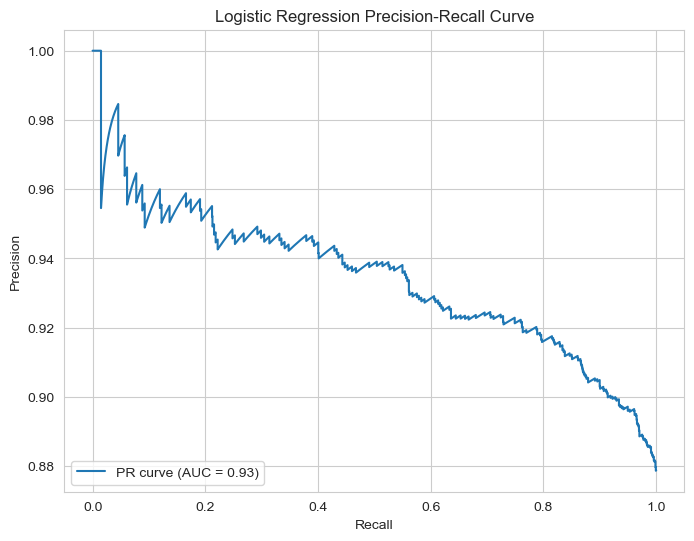


Top 10 Feature Importance for Logistic Regression:
                 feature_names  feature_importance
9                   EmailOpens            0.056029
7                   TimeOnSite            0.043101
10                 EmailClicks            0.029406
5                WebsiteVisits            0.027553
11           PreviousPurchases            0.025639
6                PagesPerVisit            0.021895
0                          Age            0.016761
22     CampaignType_Conversion            0.003752
8                 SocialShares            0.002492
21  CampaignType_Consideration            0.001570

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.36      0.38      0.37       194
           1       0.91      0.91      0.91      1406

    accuracy                           0.84      1600
   macro avg       0.64      0.64      0.64      1600
weighted avg       0.85      0.84      0.84      1600

Confusion Matrix:
[[  74  120]
 

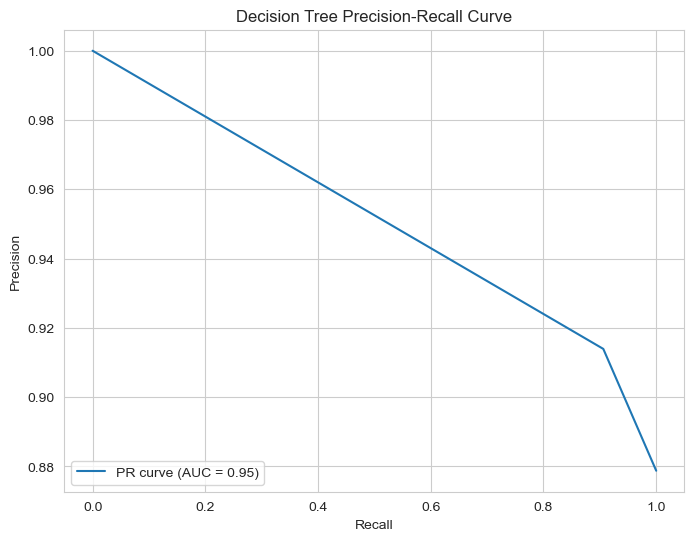


Top 10 Feature Importance for Decision Tree:
       feature_names  feature_importance
3   ClickThroughRate            0.098042
2            AdSpend            0.094401
7         TimeOnSite            0.091146
4     ConversionRate            0.089329
6      PagesPerVisit            0.083722
9         EmailOpens            0.080140
12     LoyaltyPoints            0.078905
5      WebsiteVisits            0.072014
1             Income            0.060179
10       EmailClicks            0.059966

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.84      0.11      0.19       194
           1       0.89      1.00      0.94      1406

    accuracy                           0.89      1600
   macro avg       0.87      0.55      0.57      1600
weighted avg       0.88      0.89      0.85      1600

Confusion Matrix:
[[  21  173]
 [   4 1402]]
F1 Score: 0.9406239516940624


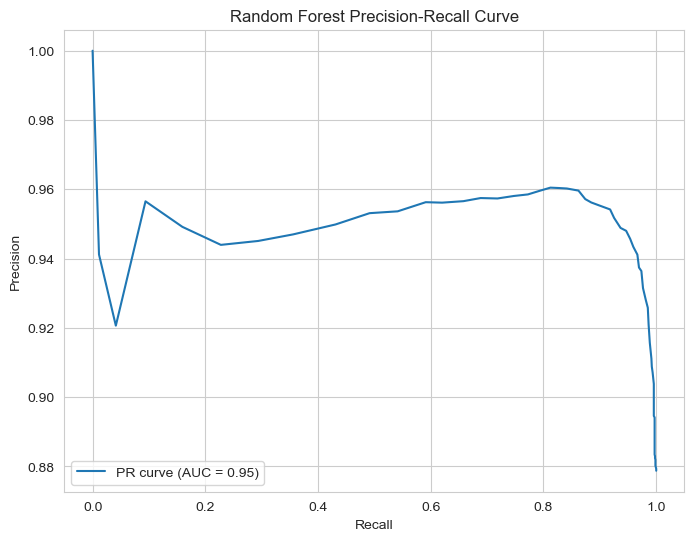


Top 10 Feature Importance for Random Forest:
        feature_names  feature_importance
3    ClickThroughRate            0.085543
7          TimeOnSite            0.085532
6       PagesPerVisit            0.084067
4      ConversionRate            0.083140
12      LoyaltyPoints            0.081502
2             AdSpend            0.080892
5       WebsiteVisits            0.067412
9          EmailOpens            0.066400
1              Income            0.060041
11  PreviousPurchases            0.057823

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.77      0.45      0.57       194
           1       0.93      0.98      0.95      1406

    accuracy                           0.92      1600
   macro avg       0.85      0.72      0.76      1600
weighted avg       0.91      0.92      0.91      1600

Confusion Matrix:
[[  88  106]
 [  27 1379]]
F1 Score: 0.9539951573849879


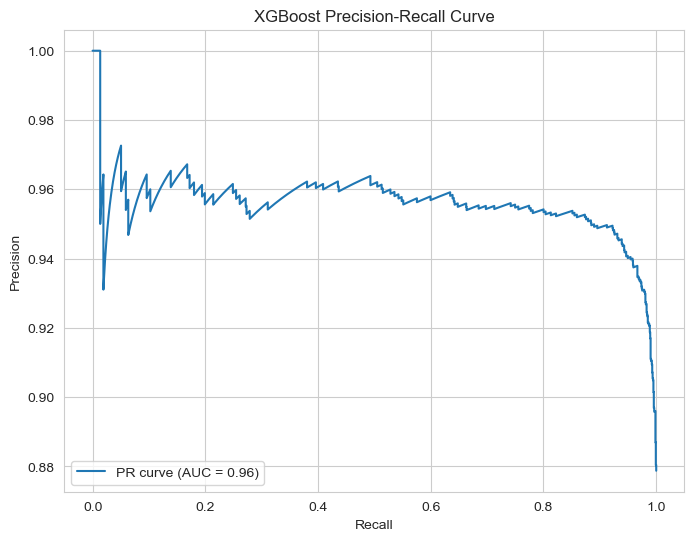


Top 10 Feature Importance for XGBoost:
              feature_names  feature_importance
22  CampaignType_Conversion            0.086803
11        PreviousPurchases            0.065171
10              EmailClicks            0.062518
9                EmailOpens            0.057481
6             PagesPerVisit            0.056635
3          ClickThroughRate            0.055386
2                   AdSpend            0.052872
7                TimeOnSite            0.051123
4            ConversionRate            0.048713
12            LoyaltyPoints            0.047004

Neural Network Performance:
              precision    recall  f1-score   support

           0       0.29      0.07      0.12       194
           1       0.88      0.98      0.93      1406

    accuracy                           0.87      1600
   macro avg       0.58      0.52      0.52      1600
weighted avg       0.81      0.87      0.83      1600

Confusion Matrix:
[[  14  180]
 [  35 1371]]
F1 Score: 0.9272911734866418


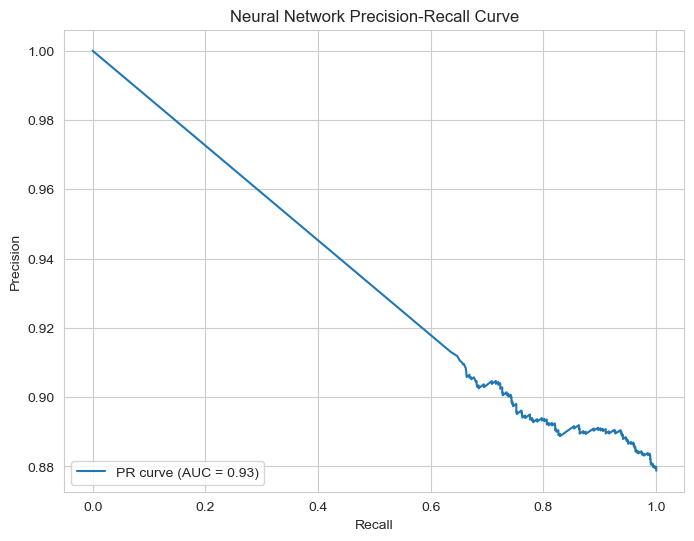


Top 10 Feature Importance for Neural Network:
               feature_names  feature_importance
2                    AdSpend            0.008187
9                 EmailOpens            0.001437
5              WebsiteVisits            0.001375
10               EmailClicks            0.001250
11         PreviousPurchases            0.000812
20    CampaignType_Awareness            0.000687
22   CampaignType_Conversion            0.000500
17  CampaignChannel_Referral            0.000500
15     CampaignChannel_Email            0.000375
6              PagesPerVisit            0.000375


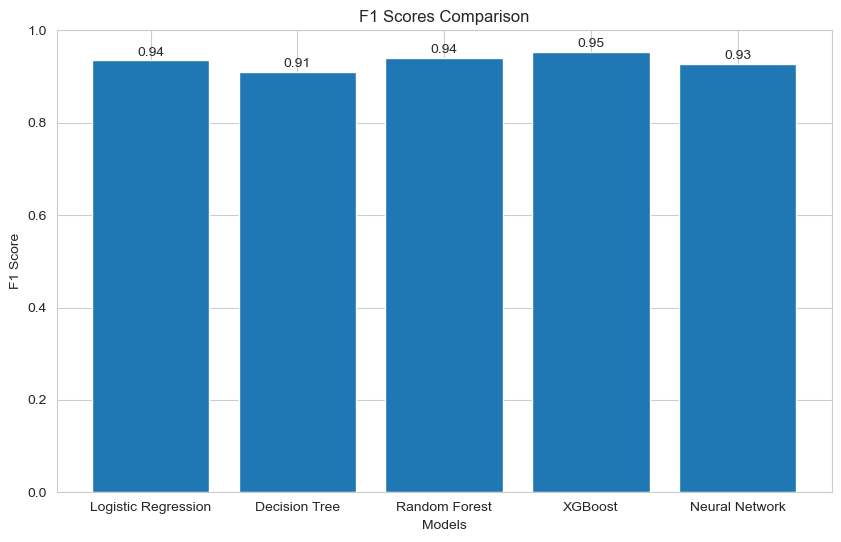


Best performing model based on F1 score:
XGBoost with F1 score of 0.95


In [67]:
# Prepare the features and target
X = df.drop(['CustomerID', 'Conversion', 'AdvertisingPlatform', 'AdvertisingTool'], axis=1)
y = df['Conversion']

# Encode categorical variables
X = pd.get_dummies(X, columns=['Gender', 'CampaignChannel', 'CampaignType'])

# Function to print feature importance
def print_feature_importance(importance, names, model_name):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df = fi_df.sort_values(by=['feature_importance'], ascending=False)
    
    print(f"\nTop 10 Feature Importance for {model_name}:")
    print(fi_df.head(10))

# Function to evaluate and print model performance
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Performance:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    
    # Precision-Recall Curve
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
evaluate_model(lr, X_test, y_test, "Logistic Regression")
print_feature_importance(np.abs(lr.coef_[0]), X.columns, "Logistic Regression")

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test, "Decision Tree")
print_feature_importance(dt.feature_importances_, X.columns, "Decision Tree")

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest")
print_feature_importance(rf.feature_importances_, X.columns, "Random Forest")

# XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
evaluate_model(xgb, X_test, y_test, "XGBoost")
print_feature_importance(xgb.feature_importances_, X.columns, "XGBoost")

# Neural Network
nn = MLPClassifier(random_state=42, max_iter=1000)
nn.fit(X_train, y_train)
evaluate_model(nn, X_test, y_test, "Neural Network")

# Feature importance for Neural Network (using permutation importance)
perm_importance = permutation_importance(nn, X_test, y_test, n_repeats=10, random_state=42)
print_feature_importance(perm_importance.importances_mean, X.columns, "Neural Network")

# Compare F1 scores
models = [lr, dt, rf, xgb, nn]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "Neural Network"]
f1_scores = [f1_score(y_test, model.predict(X_test if model in [lr, nn] else X_test)) for model in models]

plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores)
plt.title("F1 Scores Comparison")
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.show()

print("\nBest performing model based on F1 score:")
best_model_index = f1_scores.index(max(f1_scores))
print(f"{model_names[best_model_index]} with F1 score of {f1_scores[best_model_index]:.2f}")

# 6. HYPERPARAMETER TUNING:

### a. Logistic Regression

In [280]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define the parameter grid with the correct prefix for the pipeline step
param_grid_lr = {
    'logistic__C': [0.001],
    'logistic__solver': ['saga'],
    'logistic__penalty': ['none']  # Ensure the solver supports these penalties
}

# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(random_state=42, max_iter=1000))  # Increase max_iter for convergence
])

# Initialize GridSearchCV with the pipeline
grid_search_lr = GridSearchCV(pipeline, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best F1 score for Logistic Regression:", grid_search_lr.best_score_)

Best parameters for Logistic Regression: {'logistic__C': 0.001, 'logistic__penalty': 'none', 'logistic__solver': 'saga'}
Best F1 score for Logistic Regression: 0.9430744789250192


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To kee

### b. Decision Tree

In [113]:
# Define the parameter grid
param_grid_dt = {
    'max_depth': [10, 20, 30, 50, 100],
    'min_samples_split': [2, 6, 10, 25],
    'min_samples_leaf': [1, 6, 12, 24],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='f1', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best F1 score for Decision Tree:", grid_search_dt.best_score_)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 24, 'min_samples_split': 2}
Best F1 score for Decision Tree: 0.9333108728224312


### c. Random Forest

In [145]:
# Define the parameter grid
# Define the parameter grid with expanded options
param_grid = {
    'n_estimators': [100, 200, 300,500],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}
# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best F1 score for Random Forest:", grid_search_rf.best_score_)

Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 score for Random Forest: 0.9385470987341942


### d. XGBoost

In [219]:
# Define the expanded parameter grid
param_grid_xgb = {
    'n_estimators': [100, 250, 400],
    'max_depth': [3],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.4]
}

# Initialize the model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1', n_jobs=-1, n_iter=50, verbose=2)
random_search_xgb.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for XGBoost:", random_search_xgb.best_params_)
print("Best F1 score for XGBoost:", random_search_xgb.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=250, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.05, max_depth=3, n_estimators=250, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_

### e. Neural Netwroks

In [241]:
# Define the parameter grid
param_grid_nn = {
    'hidden_layer_sizes': [(50,60), (100,110), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0004, 0.003, 0.02]
}

# Initialize the model
nn = MLPClassifier(random_state=42, max_iter=1000)

# Initialize GridSearchCV
grid_search_nn = GridSearchCV(nn, param_grid_nn, cv=5, scoring='f1', n_jobs=-1)
grid_search_nn.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Neural Network:", grid_search_nn.best_params_)
print("Best F1 score for Neural Network:", grid_search_nn.best_score_)

Best parameters for Neural Network: {'activation': 'tanh', 'alpha': 0.0004, 'hidden_layer_sizes': (50, 60), 'solver': 'adam'}
Best F1 score for Neural Network: 0.9338663705554271


### VISUAL COMPARISON OF THE RESULTS: 

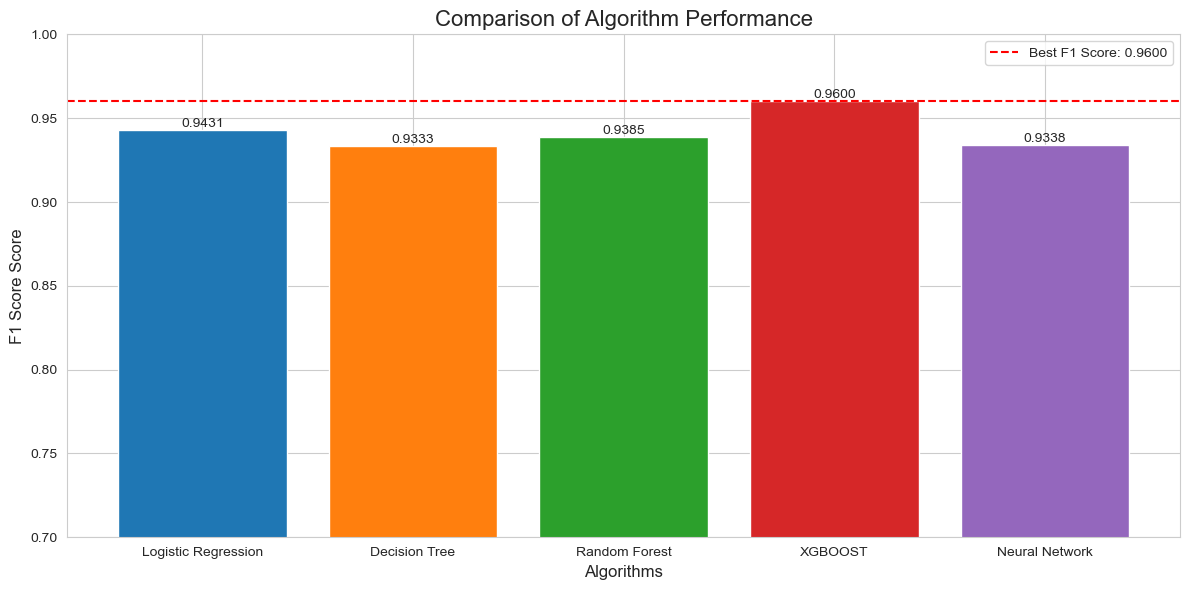

In [289]:
# Define the algorithms and their corresponding accuracy scores
algorithms = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBOOST', 'Neural Network']
accuracy_scores = [0.94307, 0.93331, 0.93854, 0.96000, 0.9338]

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(algorithms, accuracy_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Customize the plot
plt.title('Comparison of Algorithm Performance', fontsize=16)
plt.xlabel('Algorithms', fontsize=12)
plt.ylabel('F1 Score Score', fontsize=12)
plt.ylim(0.7, 1)  # Set y-axis limit from 0 to 1

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

# Add a horizontal line for the best accuracy
best_accuracy = max(accuracy_scores)
plt.axhline(y=best_accuracy, color='r', linestyle='--', label=f'Best F1 Score: {best_accuracy:.4f}')

plt.legend()
plt.tight_layout()
plt.show()
